# Example of Usage of CONFETTI

In [1]:
import numpy as np
import keras
from sklearn import preprocessing
from pathlib import Path
import warnings
# Suppress specific warning
warnings.filterwarnings("ignore", category=FutureWarning)

## Load Data

In [2]:
from sktime.datasets import load_UCR_UEA_dataset
dataset = 'BasicMotions'

#Data will load with shape (instances, dimensions, timesteps)
X_train, y_train = load_UCR_UEA_dataset("BasicMotions", split="train", return_type="numpy3d")
X_test, y_test = load_UCR_UEA_dataset("BasicMotions", split="test", return_type="numpy3d")

#Reshape data to (instances, timesteps, dimensions)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[2],X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[1])

#Encode
le = preprocessing.LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

#One Hot the labels for the CNN
y_train_encoded, y_test_encoded = keras.utils.to_categorical(y_train), keras.utils.to_categorical(y_test)


nb_classes = len(np.unique(np.concatenate([y_train,y_test])))
input_shape = X_train.shape[1:] #The input shape for our CNN should be (timesteps, dimensions)

## Model

### Train a Model

In [3]:
#Train model yourself
#from models.fcn import ClassifierFCN
#
#model = ClassifierFCN(input_shape=input_shape, nb_classes=nb_classes, dataset_name=dataset, verbose=False)
#
#model.fit(X_train, y_train_encoded, X_test, y_test_encoded)

### or Load a Trained Model

In [4]:
#Load trained model
# Ensure the path is always relative to the project root
model_path = Path.cwd().parent  / "models" / "trained_models" / dataset / f"{dataset}_fcn.keras"
# Load the model
model = keras.models.load_model(str(model_path))

# Explainer

Firt, we need to obtain the class activation map weights.

In [5]:
import confetti.CAM.class_activation_map as cam

testing_weights = cam.compute_weights_cam(model, X_test, dataset=dataset, save_weights=True, data_type='testing')

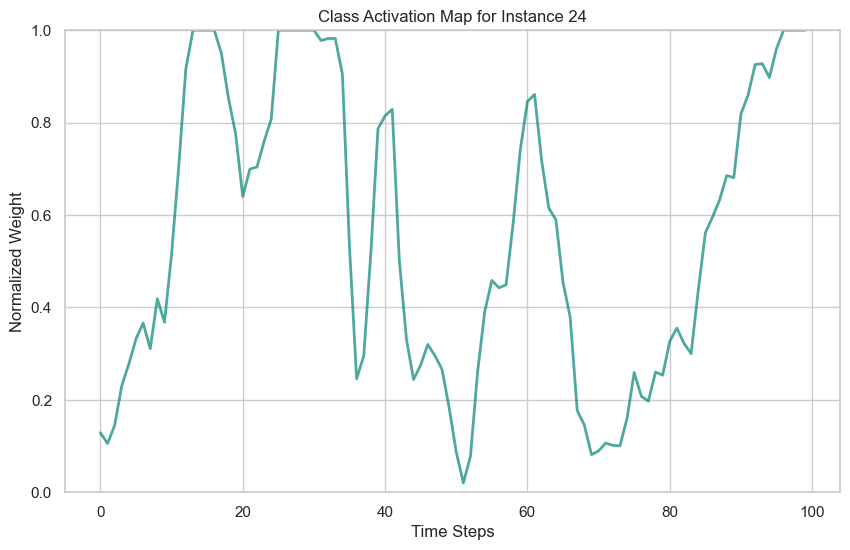

In [6]:
cam.visualize_cam(testing_weights, 24)

We are now ready to create our CONFETTI explainer.

In [15]:
from confetti.explainer.confetti_explainer import CONFETTI

ce = CONFETTI(model_path, X_train, X_test, y_test, y_train, testing_weights)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [8]:
ce_directory = Path.cwd().parent/ "results" / dataset
ce.counterfactual_generator(ce_directory, save_counterfactuals=False, optimization=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1

In [ ]:
ce_directory = Path.cwd().parent/ "results" / dataset
ce.parallelized_counterfactual_generator(ce_directory,save_counterfactuals=True,processes=8)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━

## Visualize the Counterfactuals

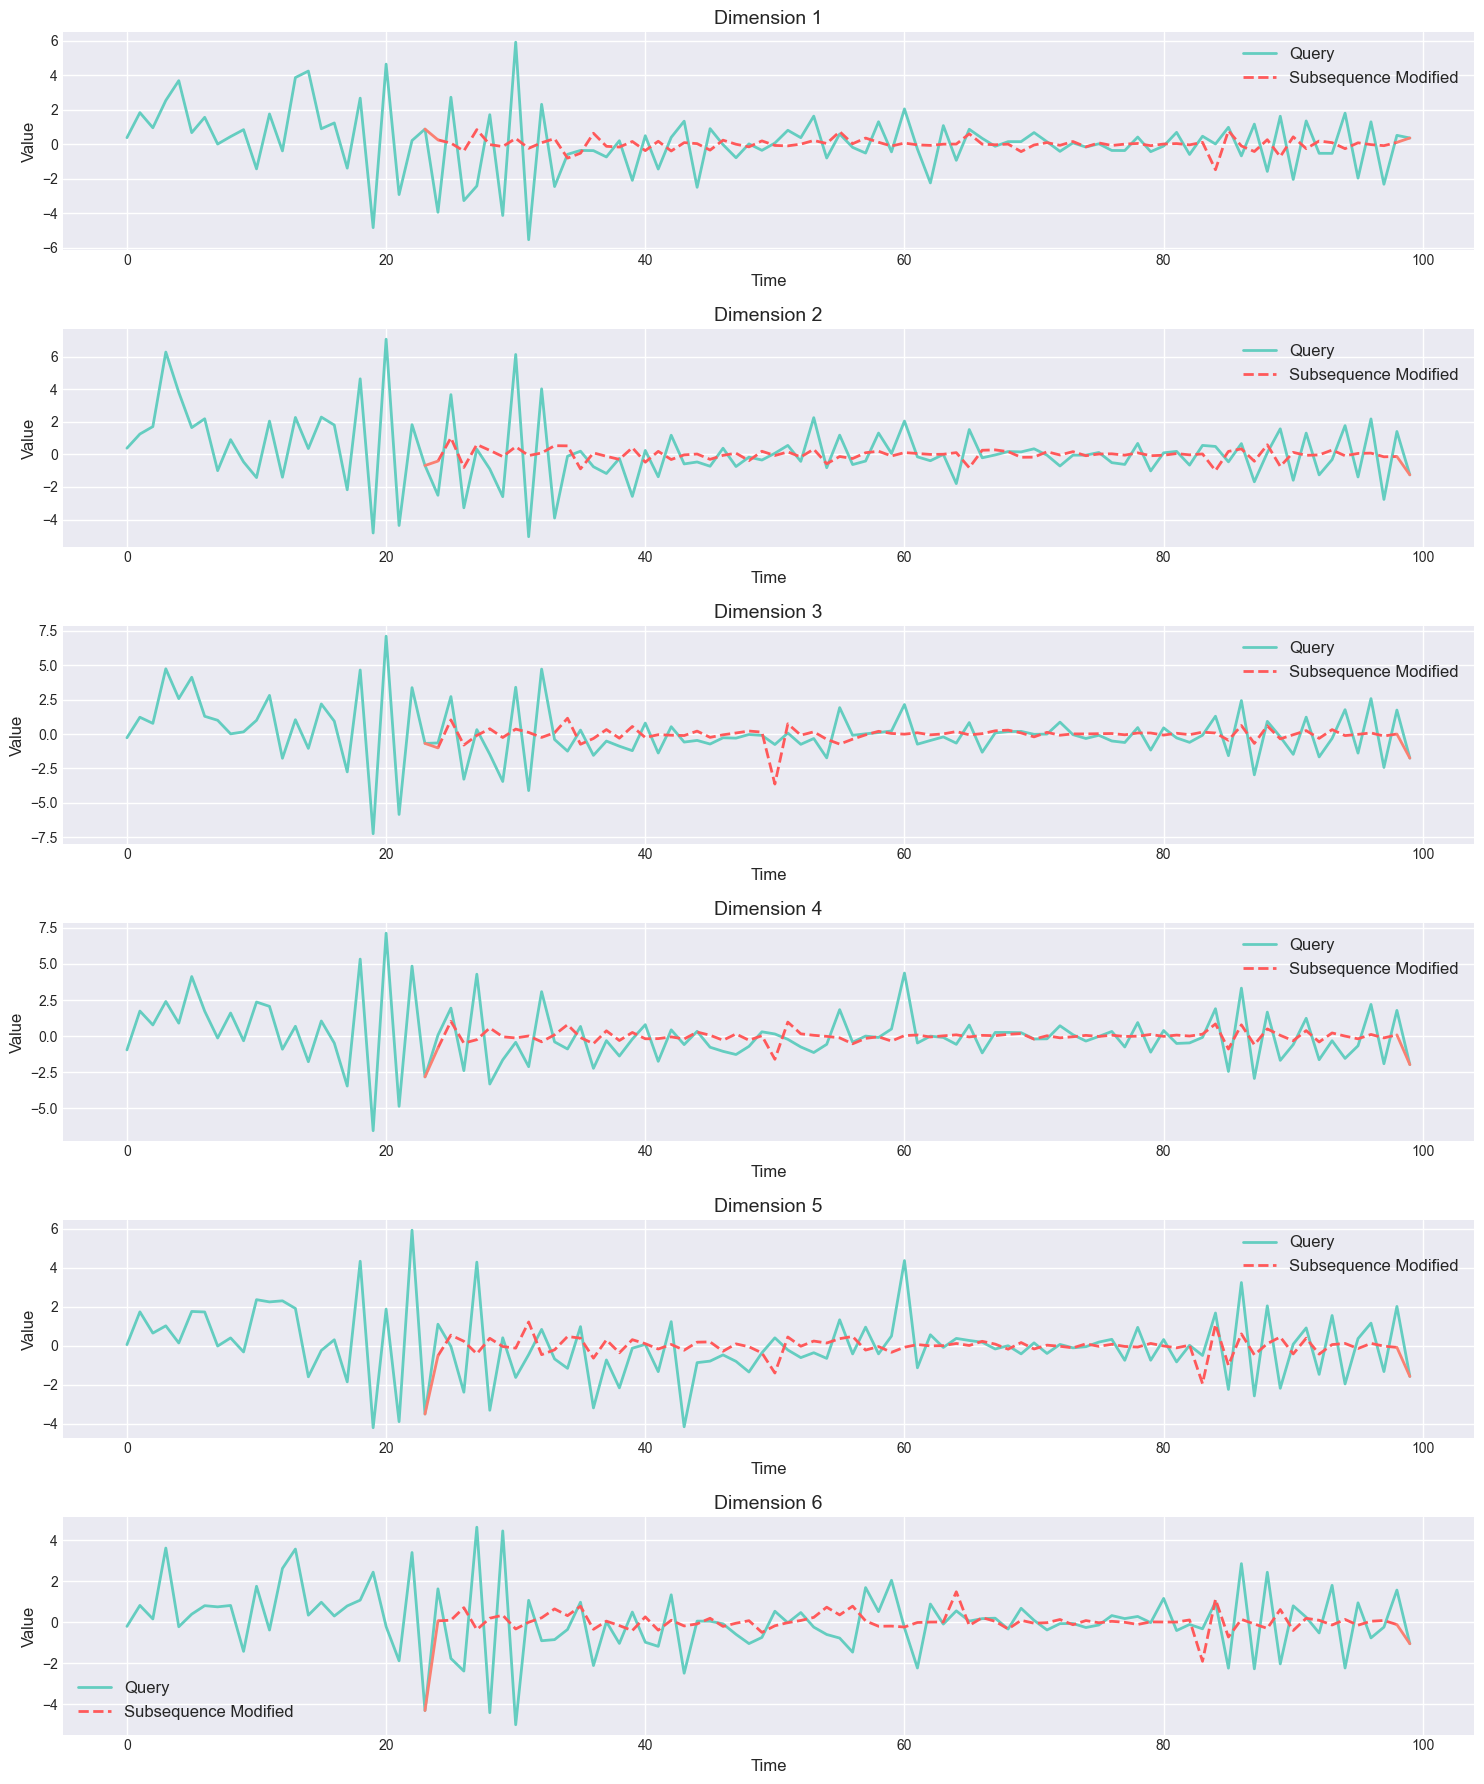

In [9]:
ce.visualize_counterfactuals(24)

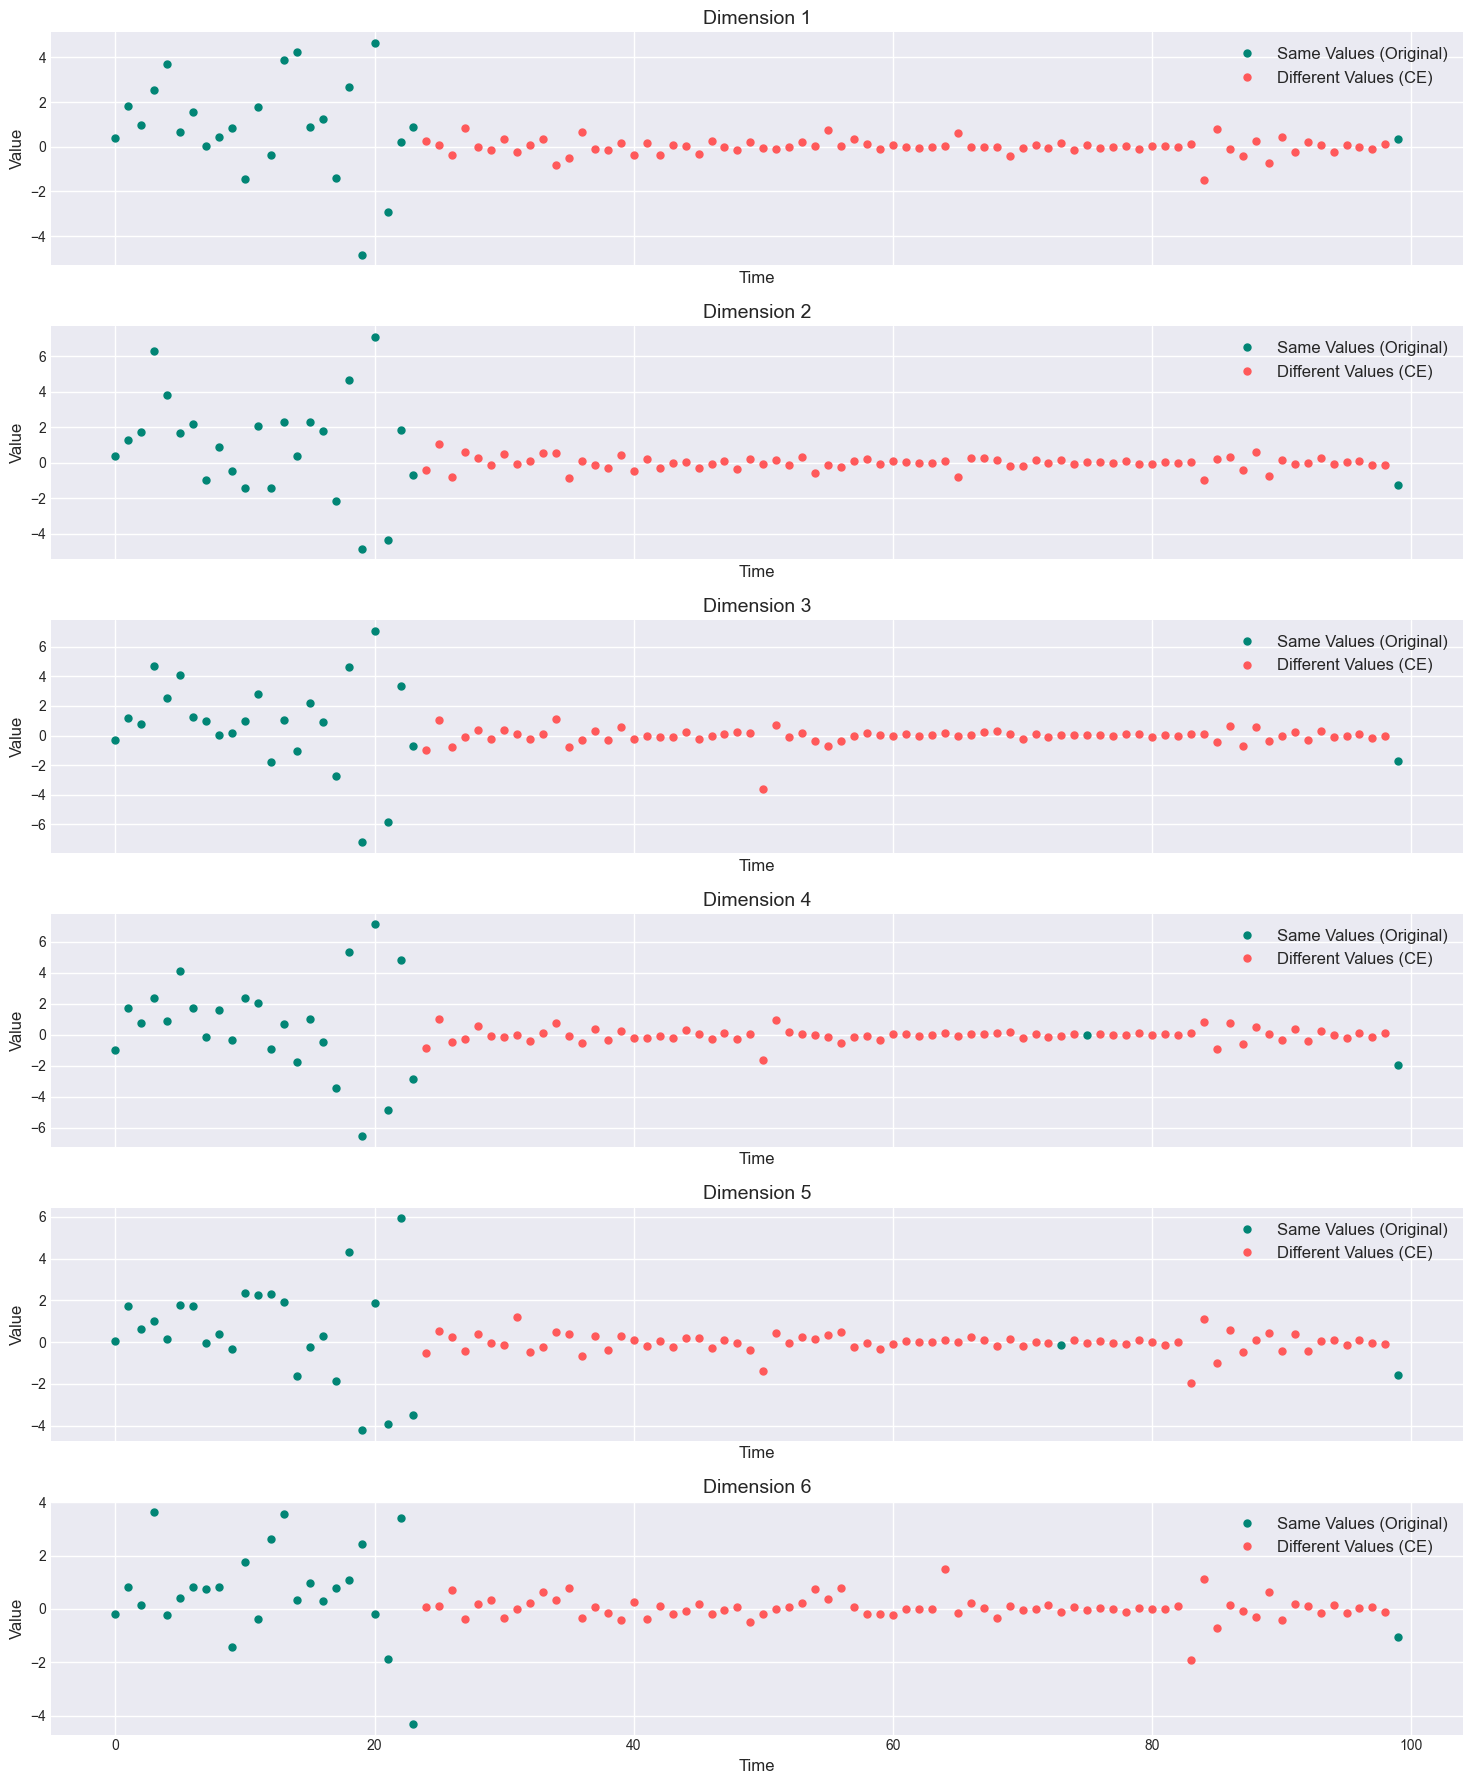

In [10]:
ce.visualize_marks(24)

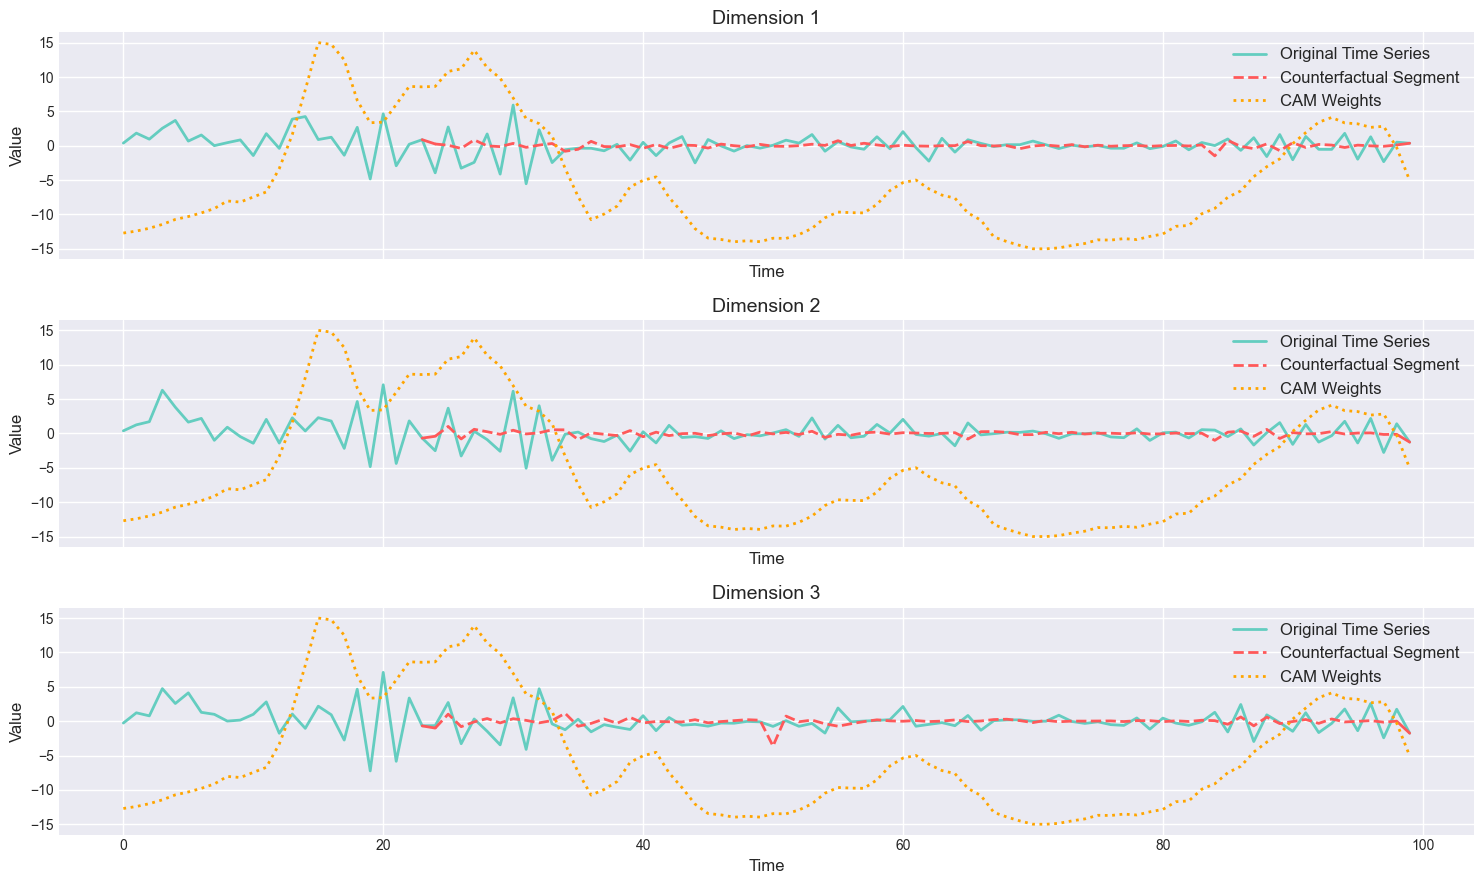

,Original_Dim_1,Original_Dim_2,Original_Dim_3,Counterfactual_Dim_1,Counterfactual_Dim_2,Counterfactual_Dim_3,CAM_Weights
0,0.383922,0.383922,-0.272575,0.383922,0.383922,-0.272575,-12.701356
1,1.835058,1.253072,1.217818,1.835058,1.253072,1.217818,-12.415567
2,0.958083,1.711730,0.774097,0.958083,1.711730,0.774097,-12.003604
3,2.541583,6.289511,4.734058,2.541583,6.289511,4.734058,-11.445615
4,3.688334,3.817740,2.571302,3.688334,3.817740,2.571302,-10.719491
...,...,...,...,...,...,...,...
95,-1.957579,-1.384954,-1.384954,0.087891,0.061258,-0.023970,3.186424
96,1.302389,2.181302,2.570154,-0.018644,0.079901,0.079901,2.676517
97,-2.314471,-2.767244,-2.423669,-0.079901,-0.146486,-0.146486,2.827228
98,0.519358,1.408924,1.739182,0.111862,-0.127842,0.000000,-0.268316


In [11]:
import confetti.explainer.visualizer as viz

viz.plot_with_cam(ce,24,weights=testing_weights[24])

# Metrics

In [12]:
ce.naive_counterfactuals

,Solution,Window,Test Instance,NUN Instance
0,"[[-0.740653, -0.740653, 10.208449, 2.867009, -...",16,0,27
1,"[[-0.247409, -0.247409, -0.77129, -0.576154, -...",18,1,27
2,"[[-0.663284, -0.663284, 5.393924, 3.116671, 1....",16,2,27
3,"[[-1.088052, -1.088052, -0.68362, -0.68362, 1....",16,3,27
4,"[[0.354481, 0.354481, 0.449142, 1.223386, 1.40...",16,4,27
5,"[[-1.182602, -0.765368, -0.519464, 0.076611, 1...",17,5,27
6,"[[1.275129, 1.275129, -0.273185, -0.234064, -0...",66,6,21
7,"[[-0.352746, -0.352746, -1.354561, -0.39901, -...",16,7,27
8,"[[0.498121, 0.498121, 0.196889, 0.197611, 0.79...",16,8,27
9,"[[0.12616, 0.12616, 1.771871, -0.385448, -0.44...",18,9,27


In [13]:
from benchmark.evaluations.evaluator import Evaluator
ev = Evaluator('confetti_naive')
cf_metrics, metrics = ev.evaluate_dataset(dataset)

Shape: (40, 100, 6)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━

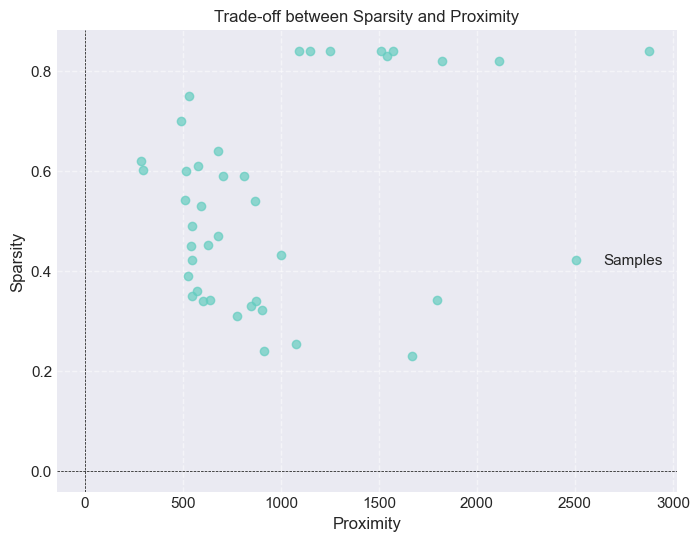

In [14]:
viz.tradeoff_sparsity_proximity(cf_metrics)